In [1]:
# Simple geopandas exampe ( from https://geopandas.org/getting_started/introduction.html )
#
# illustrate "polyarea" like problem with builtin New York Borough dataset - nybb
#
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

/var/folders/t8/r6ksvxyc8xj78r0059bkhsm00000gr/T/ipykernel_7775/2059147665.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  path_to_data = geopandas.datasets.get_path("nybb")


BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [2]:
# Set things up
gdf = gdf.set_index("BoroName")

In [3]:
gdf["area"] = gdf.area
gdf["boundary"] = gdf.boundary

In [4]:
display(gdf['area'], gdf["boundary"] )

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

<Axes: >

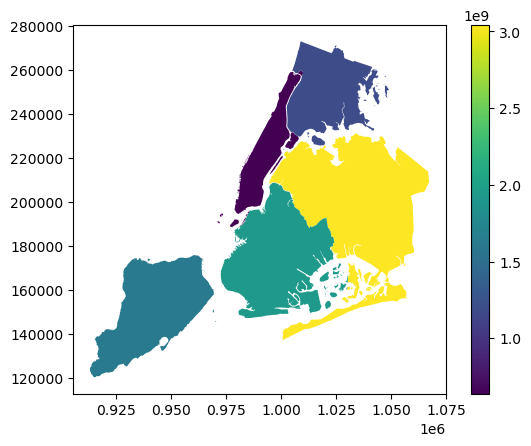

In [5]:
# Libraries like geopandas have higher-level functions builtin e.g.
# Let's plot the shapes of each Borough, colored by area.
#
# this only needs one line because the gdf.plot function knows that the
# gdf. object (a GeoDataFrame) has an attribute .geometry, that it uses to make the outline.
#
gdf.plot("area", legend=True)

In [ ]:
type(gdf)

In [ ]:
# GeoDataFrame has a defauly display method for geometry and boundary too
display( gdf.geometry[3] )
display( gdf.boundary[3] )

In [ ]:
# GeoDataFrame (like Pandas) is built on Python dictionaries
gdf.keys()

In [ ]:
?geopandas.geodataframe.GeoDataFrame

In [ ]:
# We can also plot the boundaries by hand 
#
# e.g. for Manhattan 
#
import matplotlib.pyplot as plt
for b in gdf.boundary[3]:
    # x=[t[0] for t in [*gdf.boundary[3][30].coords]];y=[t[1] for t in [*gdf.boundary[3][30].coords]]
    x=[t[0] for t in [*b.coords]];y=[t[1] for t in [*b.coords]]
    plt.plot(x,y)

In [ ]:
#
# We can create out own polygons e.g.
#
#
from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2, p3])
g

In [ ]:
#
# and compute their area!
#
g.area

In [ ]:
#
# and draw them
#
display( g[0],g[1],g[2] )

In [ ]:
#
# and draw buffers around them
#
gb=g.buffer(0.5)
display( gb[0], gb[1], gb[2] )